# Comparison of time series models

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("macrodata.csv",parse_dates=True,index_col=0)

In [4]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


# ETS Decomposition

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

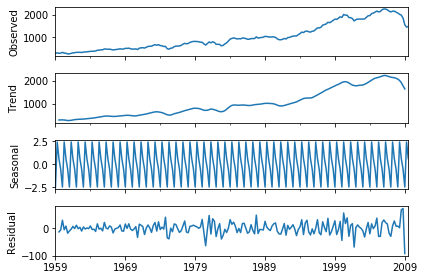

In [14]:
seasonal_decompose(df["realinv"],model='additive').plot();

# Holt Winters Decomposition Method

In [15]:
dt=pd.read_csv("airline_passengers.csv",parse_dates=True,index_col=0)

In [18]:
dt=dt.dropna()

In [20]:
dt.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

#### freq component tells what is the frequency of the data i.e here the data is starting every month first day so there is a set pattern. Use "MS " here as month start

Alias   Description
B       business day frequency
C       custom business day frequency (experimental)
D       calendar day frequency
W       weekly frequency
M       month end frequency
BM      business month end frequency
CBM     custom business month end frequency
MS      month start frequency
BMS     business month start frequency
CBMS    custom business month start frequency
Q       quarter end frequency
BQ      business quarter endfrequency
QS      quarter start frequency
BQS     business quarter start frequency
A       year end frequency
BA      business year end frequency
AS      year start frequency
BAS     business year start frequency
BH      business hour frequency
H       hourly frequency
T, min  minutely frequency
S       secondly frequency
L, ms   milliseonds
U, us   microseconds
N       nanoseconds

In [21]:
dt.index.freq="MS"

In [23]:
dt.index # now the index changed to month start

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

## Single Exponential Smoothing

In [24]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

![](span.JPG)

In [25]:
span=12
alpha=2/(span+1)

In [40]:
dt["SES"]=SimpleExpSmoothing(dt['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
# SES: Simple exponential smoothing

## Double Exponential Smoothing (Holt Model)

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [46]:
dt["DES_add"]=ExponentialSmoothing(dt["Thousands of Passengers"],trend='add').fit().fittedvalues.shift(-1)

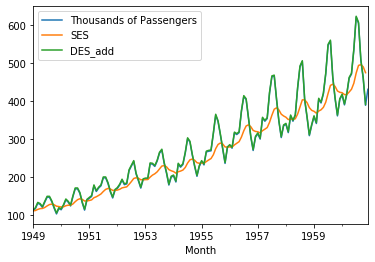

In [47]:
dt[['Thousands of Passengers', 'SES', 'DES_add']].plot()

#### Real data is almost superimposed on Double exponential smooting data. We can zoom on it 

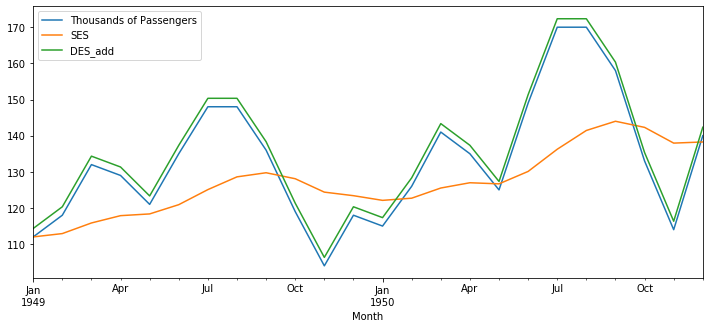

In [48]:
dt[['Thousands of Passengers', 'SES', 'DES_add']].iloc[:24].plot(figsize=(12,5))

### Comparison b/w additive & multiplicative models in Double Exponential Smoothing

In [49]:
dt["DES_mul"]=ExponentialSmoothing(dt["Thousands of Passengers"],trend='mul').fit().fittedvalues.shift(-1)

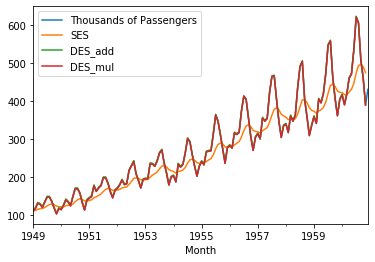

In [50]:
dt[['Thousands of Passengers', 'SES', 'DES_add','DES_mul']].plot()

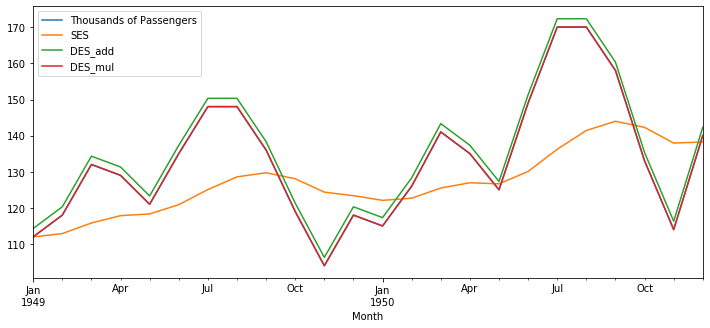

In [51]:
dt[['Thousands of Passengers', 'SES', 'DES_add','DES_mul']].iloc[:24].plot(figsize=(12,5))

## Triple Exponential Smoothing (Holt Winters Model)

In [53]:
dt["TES_mul"]=ExponentialSmoothing(dt["Thousands of Passengers"],trend='mul',seasonal='mul',seasonal_periods=12) \
.fit().fittedvalues

In [56]:
dt.columns

Index(['Thousands of Passengers', 'SES', 'DES', 'DES_add', 'DES_mul',
       'TES_mul'],
      dtype='object')

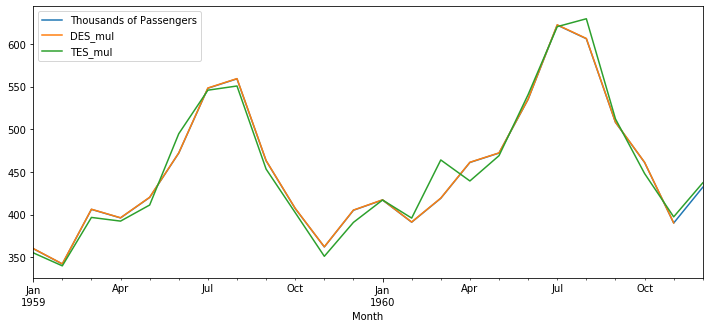

In [63]:
dt[['Thousands of Passengers','DES_mul','TES_mul']].iloc[-24:].plot(figsize=(12,5))

#### It is better to choose DES over TES model for training the data as DES fits well on training data. This will help in better forecasting